In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")



def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435274,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749117,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007427,237458000


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


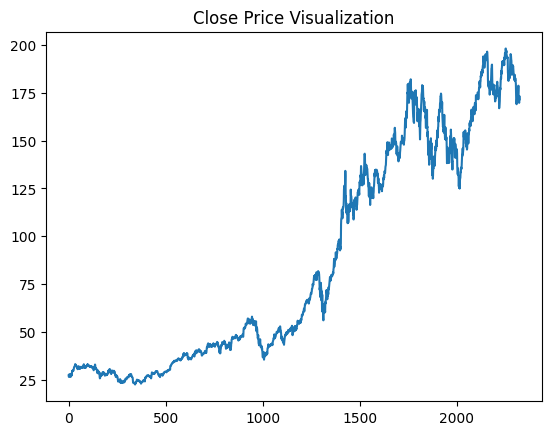

In [ ]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2320,171.759995,173.050003,170.059998,172.279999,71106600
2321,170.570007,171.940002,169.449997,170.850006,54288300
2322,170.000000,171.419998,169.580002,169.710007,57388400
2323,170.410004,173.600006,170.110001,173.309998,60273300


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2320    185.3700
2321    185.3756
2322    185.3650
2323    185.3584
2324    185.2975
Name: Close, Length: 2325, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

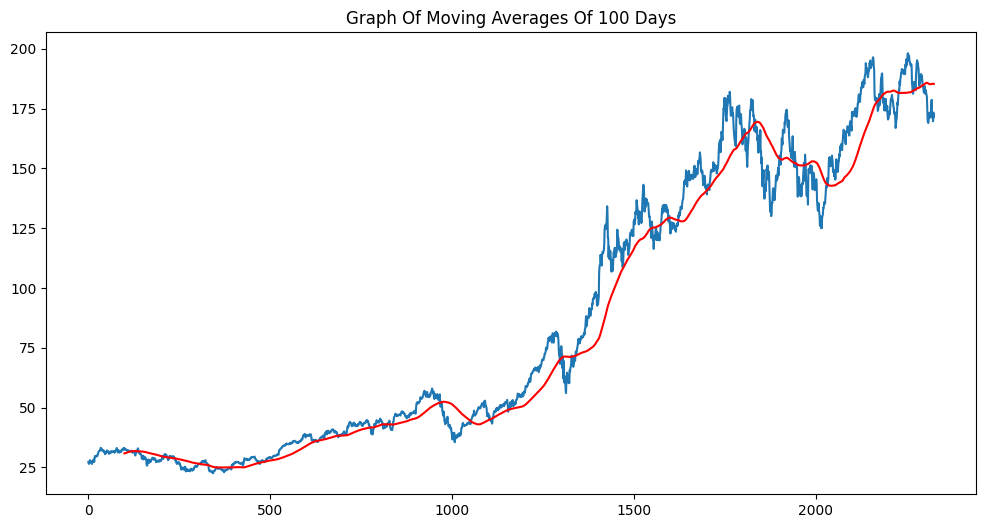

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2320    183.70990
2321    183.67505
2322    183.62075
2323    183.58250
2324    183.52095
Name: Close, Length: 2325, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

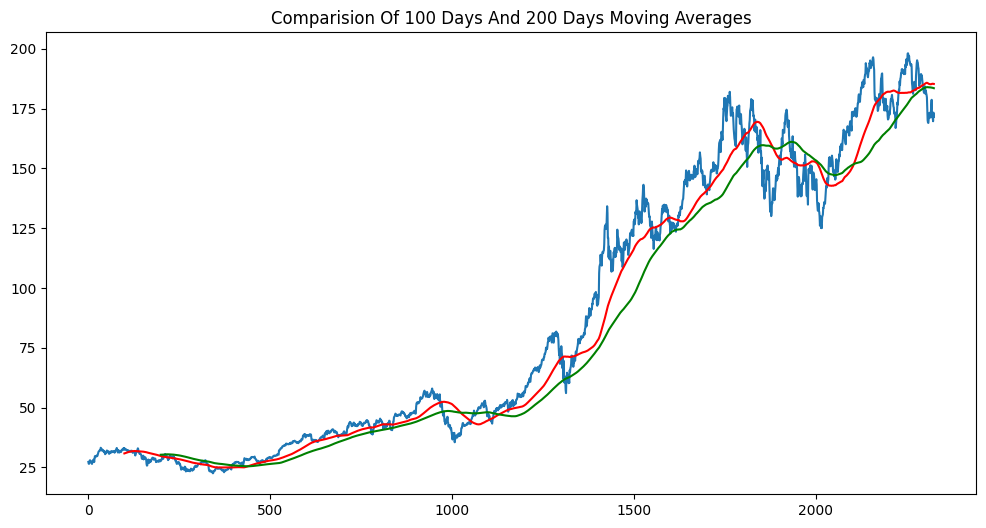

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(2325, 5)

In [ ]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1627, 7)
(698, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435274,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749117,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007427,237458000


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1627,2021-06-21,130.300003,132.410004,129.210007,132.300003,130.253189,79663300
1628,2021-06-22,132.130005,134.080002,131.619995,133.979996,131.907196,74783600
1629,2021-06-23,133.770004,134.320007,133.229996,133.699997,131.631577,60214200
1630,2021-06-24,134.449997,134.639999,132.929993,133.410004,131.346069,68711000
1631,2021-06-25,133.460007,133.889999,132.809998,133.110001,131.050674,70783700


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.89210028],
       [0.90570176],
       [0.8946714 ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1527, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [68]:
model.save('keras_model.h5')

In [69]:
test_close.shape
test_close

array([[132.30000305],
       [133.97999573],
       [133.69999695],
       [133.41000366],
       [133.11000061],
       [134.77999878],
       [136.33000183],
       [136.96000671],
       [137.27000427],
       [139.96000671],
       [142.02000427],
       [144.57000732],
       [143.24000549],
       [145.11000061],
       [144.5       ],
       [145.63999939],
       [149.1499939 ],
       [148.47999573],
       [146.38999939],
       [142.44999695],
       [146.1499939 ],
       [145.3999939 ],
       [146.80000305],
       [148.55999756],
       [148.99000549],
       [146.77000427],
       [144.97999573],
       [145.63999939],
       [145.86000061],
       [145.52000427],
       [147.36000061],
       [146.94999695],
       [147.05999756],
       [146.13999939],
       [146.08999634],
       [145.6000061 ],
       [145.86000061],
       [148.88999939],
       [149.1000061 ],
       [151.11999512],
       [150.19000244],
       [146.36000061],
       [146.69999695],
       [148

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-30-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [70]:
final_df.head()

,0
0,142.059998
1,137.089996
2,131.960007
3,134.139999
4,134.990005


In [71]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.31437305],
       [0.25357793],
       [0.19082576],
       [0.21749234],
       [0.22788997],
       [0.21504589],
       [0.25724769],
       [0.24954121],
       [0.25137618],
       [0.2403669 ],
       [0.23278286],
       [0.2296025 ],
       [0.23253816],
       [0.20587158],
       [0.17712533],
       [0.16330283],
       [0.16525987],
       [0.11792048],
       [0.11620795],
       [0.10996939],
       [0.05663605],
       [0.05993886],
       [0.13981652],
       [0.10715599],
       [0.06972473],
       [0.04611617],
       [0.06189599],
       [0.        ],
       [0.05785927],
       [0.04428138],
       [0.06850151],
       [0.05712536],
       [0.0933333 ],
       [0.11266054],
       [0.10275231],
       [0.05100915],
       [0.04440364],
       [0.08599387],
       [0.07559633],
       [0.04562686],
       [0.05174307],
       [0.0593272 ],
       [0.06152904],
       [0.04330276],
       [0.0708257 ],
       [0.08122323],
       [0.11669726],
       [0.120

In [ ]:
input_data.shape

(798, 1)

In [73]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [72]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(698, 100, 1)
(698,)


In [ ]:

y_pred = model.predict(x_test)

22/22 [==============================] - 4s 129ms/step


In [ ]:
y_pred.shape

(698, 1)

In [ ]:
y_test

array([0.19498474, 0.21553511, 0.21211005, 0.20856273, 0.20489297,
       0.22532108, 0.24428136, 0.25198784, 0.25577986, 0.28868509,
       0.31388384, 0.34507653, 0.3288074 , 0.35168196, 0.34422018,
       0.35816512, 0.40110084, 0.39290514, 0.36733943, 0.31914369,
       0.36440359, 0.35522928, 0.37235477, 0.39388375, 0.39914379,
       0.37198781, 0.35009168, 0.35816512, 0.36085627, 0.35669729,
       0.37920489, 0.37418956, 0.37553513, 0.36428133, 0.36366967,
       0.35767591, 0.36085627, 0.39792047, 0.40048936, 0.42519871,
       0.41382265, 0.36697248, 0.37113145, 0.38935782, 0.40795114,
       0.40685009, 0.39143731, 0.38140664, 0.39437316, 0.44966354,
       0.43388381, 0.44220176, 0.45614671, 0.46409789, 0.49333336,
       0.47400612, 0.46128449, 0.39889909, 0.40599391, 0.38850146,
       0.39963301, 0.39669716, 0.36330271, 0.32513764, 0.3311314 ,
       0.36073401, 0.37272173, 0.3738226 , 0.35486232, 0.31253826,
       0.32379206, 0.30752293, 0.32159013, 0.27865442, 0.30275

In [ ]:
y_pred

array([[-0.00038795],
       [-0.00039105],
       [-0.00039554],
       [-0.0004016 ],
       [-0.00040942],
       [-0.00041917],
       [-0.0004306 ],
       [-0.0004434 ],
       [-0.00045737],
       [-0.0004724 ],
       [-0.00048837],
       [-0.00050526],
       [-0.0005232 ],
       [-0.00054262],
       [-0.00056382],
       [-0.000587  ],
       [-0.00061212],
       [-0.00063888],
       [-0.00066713],
       [-0.00069691],
       [-0.0007277 ],
       [-0.00075836],
       [-0.00078795],
       [-0.00081575],
       [-0.00084135],
       [-0.0008648 ],
       [-0.00088645],
       [-0.00090665],
       [-0.00092549],
       [-0.0009429 ],
       [-0.00095879],
       [-0.000973  ],
       [-0.00098566],
       [-0.000997  ],
       [-0.00100719],
       [-0.00101638],
       [-0.00102469],
       [-0.00103217],
       [-0.00103871],
       [-0.00104435],
       [-0.00104924],
       [-0.00105373],
       [-0.00105838],
       [-0.00106348],
       [-0.00106891],
       [-0

In [ ]:
scaler.scale_

array([0.01223242])

In [ ]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

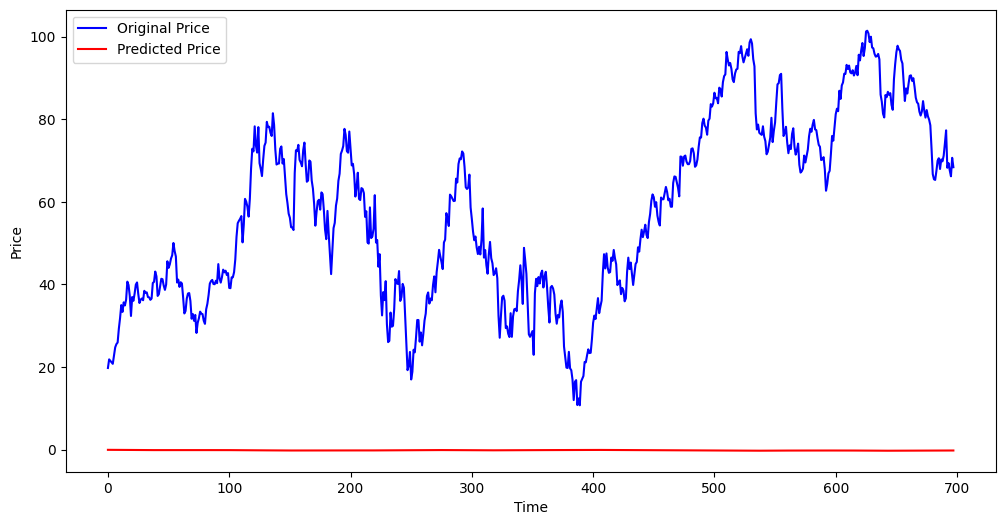

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  57.899251153002616
